# Smart Factory Energy Prediction Challenge

## Problem Statement

You've been hired as a data scientist for SmartManufacture Inc., a leading industrial automation company. The company has deployed an extensive sensor network throughout one of their client's manufacturing facilities to monitor environmental conditions and energy usage.

The client is concerned about the increasing energy costs associated with their manufacturing equipment. They want to implement a predictive system that can forecast equipment energy consumption based on various environmental factors and sensor readings from different zones of the factory.

## Task

Your assignment is to develop a machine learning model that can accurately predict the energy consumption of industrial equipment (equipment_energy_consumption) based on the data collected from the factory's sensor network. This will help the facility managers optimize their operations for energy efficiency and cost reduction.

## Goals

1. Analyze the provided sensor data to identify patterns and relationships between environmental factors and equipment energy consumption ✅
2. Build a robust regression model to predict equipment energy consumption
3. Evaluate the model's performance using appropriate metrics
4. Provide actionable insights and recommendations for reducing energy consumption

## Notes on Feature Selection and Random Variables

The dataset includes two variables named random_variable1 and random_variable2. Part of your task is to determine, through proper data analysis and feature selection techniques, whether these variables should be included in your model or not. This mimics real-world scenarios where not all available data is necessarily useful for prediction.

Your approach to handling these variables should be clearly documented and justified in your analysis. This will be an important part of evaluating your feature selection methodology.

Note that your final solution will also be evaluated on a separate holdout dataset that we maintain privately, which serves as an additional check on your model's generalization capability.

## Deliverables

Your submission should include:

1. **A well-documented Jupyter notebook** containing:
   - Exploratory data analysis (EDA)
   - Data preprocessing steps
   - Feature engineering and selection
   - Model development and training
   - Model evaluation and testing
   - Key findings and insights

2. **Python script(s)/notebook(s)** with your final model implementation

3. **A brief report (PDF or Markdown format)** summarizing:
   - Your approach to the problem
   - Key insights from the data
   - Model performance evaluation
   - Recommendations for reducing equipment energy consumption

## Evaluation Criteria

Your solution will be evaluated based on:

1. **Code Quality and Structure (25%)**
   - Clean, well-organized, and properly documented code
   - Appropriate use of functions and classes
   - Effective use of Git with meaningful commit messages
   - Code readability and adherence to Python conventions

2. **Data Analysis and Preprocessing (25%)**
   - Thoroughness of exploratory data analysis
   - Handling of missing values, outliers, and data transformations
   - Feature engineering creativity and effectiveness
   - Proper data splitting methodology

3. **Model Development (25%)**
   - Selection and justification of algorithms
   - Hyperparameter tuning approach
   - Implementation of cross-validation
   - Model interpretability considerations

4. **Results and Insights (25%)**
   - Model performance metrics (RMSE, MAE, R²) on both the test dataset and our private holdout dataset
   - Quality of visualizations and explanations
   - Practical insights and recommendations
   - Critical evaluation of model limitations

## Dataset
>Smart Factory Sensor Data and it's description is in the docs folder.

## Model training
>Pick a model as needed

## Evaluation
>RMSE, MAE and R2 metrics for evaluation

## Experimentation
>Perform experimentation to improve performance

## Dealing with additional variables
>1. I'll see the correlation between predictors and the target variable
>2. I'll build a RandomForestRegressor model and get feature importances from it
>Using these two ways, I'll decide which random variable/s to inlcude or exclude

## Import libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Analysis and Preprocessing
### Load the data

In [19]:
data=pd.read_csv('data/data.csv')

In [20]:
data.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [21]:
data.shape

(16857, 29)

The data has 16857 rows and 29 columns.

In [22]:
data.describe()

,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


So there are 23 numeric columns and most columns have missing values which should be imputed.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

So there are 6 text columns and 23 numeric columns in this dataset.

In [24]:
data.columns

Index(['timestamp', 'equipment_energy_consumption', 'lighting_energy',
       'zone1_temperature', 'zone1_humidity', 'zone2_temperature',
       'zone2_humidity', 'zone3_temperature', 'zone3_humidity',
       'zone4_temperature', 'zone4_humidity', 'zone5_temperature',
       'zone5_humidity', 'zone6_temperature', 'zone6_humidity',
       'zone7_temperature', 'zone7_humidity', 'zone8_temperature',
       'zone8_humidity', 'zone9_temperature', 'zone9_humidity',
       'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
       'wind_speed', 'visibility_index', 'dew_point', 'random_variable1',
       'random_variable2'],
      dtype='object')

Missing values

In [25]:
data.isna().sum()

timestamp                         0
equipment_energy_consumption    844
lighting_energy                 809
zone1_temperature               867
zone1_humidity                  801
zone2_temperature               853
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

### Parsing dates

The dataset has a datetime format column i.e. the timestamp column. So I'll use the `parse_dates` parameter while loading the data.

In [26]:
data=pd.read_csv('data/data.csv',parse_dates=['timestamp'],low_memory=False)

Now look at the data. The timestamp will have datetime as type

In [27]:
data.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [28]:
data.describe()

,timestamp,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,16857,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,2016-03-10 02:16:38.647446272,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
min,2016-01-11 17:00:00,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,2016-02-09 21:20:00,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,2016-03-10 00:10:00,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,2016-04-08 03:40:00,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,2016-12-01 15:50:00,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617
std,NaN,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16857 non-null  datetime64[ns]
 1   equipment_energy_consumption  16013 non-null  object        
 2   lighting_energy               16048 non-null  object        
 3   zone1_temperature             15990 non-null  object        
 4   zone1_humidity                16056 non-null  object        
 5   zone2_temperature             16004 non-null  object        
 6   zone2_humidity                15990 non-null  float64       
 7   zone3_temperature             16055 non-null  float64       
 8   zone3_humidity                15979 non-null  float64       
 9   zone4_temperature             16041 non-null  float64       
 10  zone4_humidity                16076 non-null  float64       
 11  zone5_temperature           

### Handling datatypes of columns

Few columns have their dtype as object though they contain numeric values. So I'll check the values of those columns and then change their dtype to float.

First I'll list all the columns which have dtype as object.

In [51]:
for label,content in data.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

equipment_energy_consumption
lighting_energy
zone1_temperature
zone1_humidity
zone2_temperature


In [52]:
data.equipment_energy_consumption

0                      60.0
1                      60.0
2                      50.0
3                      50.0
4                      60.0
                ...        
16852    1139.9856929495108
16853                  50.0
16854                  50.0
16855                  80.0
16856                  30.0
Name: equipment_energy_consumption, Length: 16857, dtype: object

So this is a numeric columns. Therefore convert to float

In [53]:
data.lighting_energy

0        -77.78778596503064
1                      30.0
2                      30.0
3                      40.0
4                      40.0
                ...        
16852                  20.0
16853     86.00296632575207
16854                   0.0
16855                   0.0
16856                   0.0
Name: lighting_energy, Length: 16857, dtype: object

In [54]:
data.zone1_temperature

0         33.74660933896648
1                     19.89
2                     19.89
3         33.74660933896648
4                     19.89
                ...        
16852                  22.1
16853                 21.29
16854                 21.39
16855                  22.5
16856    20.066666666666695
Name: zone1_temperature, Length: 16857, dtype: object

In [55]:
data.zone1_humidity

0         47.59666666666671
1         46.69333333333329
2                      46.3
3          46.0666666666667
4         46.33333333333329
                ...        
16852    38.723333333333294
16853      39.6266666666667
16854                 37.59
16855                 39.36
16856    43.863333333333294
Name: zone1_humidity, Length: 16857, dtype: object

So the columns which were as object dtype contain numeric values. So I'll change the dtype to float

In [56]:
data.equipment_energy_consumption=data.equipment_energy_consumption.astype('float64')
data.lighting_energy=data.lighting_energy.astype('float64')
data.zone1_temperature=data.zone1_temperature.astype('float64')
data.zone1_humidity=data.zone1_humidity.astype('float64')
data.zone2_temperature=data.zone2_temperature.astype('float64')

ValueError: could not convert string to float: 'error'

In [61]:
data.equipment_energy_consumption.value_counts()


equipment_energy_consumption
50.0                   3400
60.0                   2385
40.0                   1762
70.0                   1193
80.0                    905
90.0                    790
100.0                   742
30.0                    656
110.0                   543
120.0                   391
20.0                    318
130.0                   256
140.0                   182
1139.9856929495108      166
-944.5664110012307      160
150.0                   109
190.0                    70
260.0                    68
280.0                    67
230.0                    66
300.0                    63
160.0                    62
240.0                    62
180.0                    61
270.0                    61
250.0                    60
220.0                    58
310.0                    56
210.0                    56
170.0                    55
370.0                    54
290.0                    53
350.0                    53
390.0                    52
320.0              

The abnormal values in this column were 
- unknown
- ???
- error
- check

In [62]:
data.lighting_energy.value_counts()

lighting_energy
0.0                   11687
10.0                   1895
20.0                   1339
30.0                    480
-77.78778596503064      177
86.00296632575207       168
-0.0                    116
40.0                     71
???                      24
-10.0                    24
-20.0                    17
error                    13
check                     9
unknown                   9
50.0                      6
-30.0                     6
-86.00296632575207        3
-40.0                     2
60.0                      1
70.0                      1
Name: count, dtype: int64

The abnormal values in this column were 
- unknown
- ???
- error
- check

In [63]:
data.zone1_temperature.value_counts()

zone1_temperature
21.0                  479
21.39                 457
21.2                  446
21.5                  430
21.29                 419
20.89                 413
21.1                  395
22.2                  382
22.0                  377
21.89                 376
21.79                 370
22.1                  368
20.79                 358
21.7                  357
21.6                  329
22.5                  280
20.7                  278
22.39                 277
22.6                  276
22.29                 269
20.6                  254
22.7                  252
20.0                  222
22.79                 216
20.1                  212
20.5                  193
19.89                 192
22.89                 190
20.2                  181
33.74660933896648     167
20.29                 166
20.39                 162
19.79                 158
23.0                  157
8.726817924356236     154
19.7                  145
19.6                  143
19.5                

The abnormal values in this column were 
- unknown
- ???
- error
- check

In [68]:
data.zone1_humidity.value_counts()

zone1_humidity
3.348059697903068      164
76.29275599510133      156
37.2                   129
39.09                  126
36.9                   121
37.7                   120
38.29                  116
38.79                  115
39.0                   111
39.4                   106
37.09                  106
38.09                  102
37.4                   102
36.29                   97
38.7                    96
38.2                    93
35.2                    91
35.4                    91
38.59                   90
39.2                    88
39.9                    86
39.5                    84
39.59                   81
37.0                    80
37.5                    79
35.5                    78
38.0                    76
43.29                   76
37.9                    74
35.29                   73
38.4                    73
36.09                   73
35.79                   72
35.7                    70
37.29                   69
37.59                   69
41.29        

Here I saw only error and check as abnormal values

In [69]:
data.zone2_temperature.value_counts()

zone2_temperature
19.2                  303
19.6                  303
19.5                  302
19.7                  296
19.29                 276
19.1                  258
19.39                 251
18.79                 243
20.29                 241
19.0                  241
19.79                 239
18.39                 231
18.89                 230
20.1                  228
18.5                  227
20.5                  226
18.2                  218
20.0                  213
20.39                 207
19.89                 207
18.1                  207
18.7                  205
20.6                  204
20.2                  192
18.6                  191
20.7                  186
18.29                 183
36.55288237266245     177
18.0                  174
17.79                 171
21.1                  170
20.89                 168
2.9881989040997503    157
20.79                 151
21.2                  146
21.0                  144
17.5                  139
21.29               

Here I saw only error as abnormal values

So to impute these columns

In [74]:
data.equipment_energy_consumption.replace(['unknown','error','???','check'],value=data.equipment_energy_consumption.mode())

TypeError: NDFrame.replace() got multiple values for argument 'value'

### Sort the dataframe or data by `timestamp` column

It is very important to sort the data on the timestamp column because it helps us easily divide the data into train and test sets like for example train data from jan - may and test data from june-aug like predicting the future from the past trained data.

This step is very important when working with time-series dataset.

In [30]:
data.sort_values(by='timestamp',ascending=True,inplace=True)

In [31]:
data.head(10)

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50.0,40.0,19.89,46.0266666666667,19.2,44.500000,19.79,44.933333,18.890000,...,17.000000,NaN,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,NaN
6,2016-01-11 18:00:00,60.0,50.0,19.89,45.7666666666667,19.2,44.500000,19.79,44.900000,35.921144,...,17.000000,NaN,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60.0,50.0,19.8566666666667,45.56,19.2,44.500000,19.73,44.900000,18.890000,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,NaN,40.0,19.79,45.5975,19.2,44.433333,19.73,44.790000,18.890000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,-32.098095,31.455702,31.455702
9,2016-01-11 18:30:00,70.0,40.0,19.8566666666667,46.09,19.23,44.400000,19.79,44.863333,18.890000,...,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,NaN,4.650000,3.089314,3.089314


### Make a copy of the original data

So that you can revert at anytime if needed.

In [32]:
data_cop=data.copy()

### Add datetime columns such as saleYear,saleMonth 

And place at the end of columns



In [33]:
data_cop['saleYear']=data_cop['timestamp'].dt.year
data_cop['saleMonth']=data_cop['timestamp'].dt.month
data_cop['saleDay']=data_cop['timestamp'].dt.day
data_cop['saleDayOfTheWeek']=data_cop['timestamp'].dt.dayofweek
data_cop['saleDayOfTheYear']=data_cop['timestamp'].dt.dayofyear

In [34]:
data_cop.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,saleYear,saleMonth,saleDay,saleDayOfTheWeek,saleDayOfTheYear
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,7.000000,63.000000,5.300000,13.275433,13.275433,2016,1,11,0,11
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,6.666667,59.166667,5.200000,18.606195,18.606195,2016,1,11,0,11
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,6.333333,55.333333,5.100000,28.642668,28.642668,2016,1,11,0,11
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,6.000000,51.500000,37.673716,45.410389,45.410389,2016,1,11,0,11
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,5.666667,47.666667,4.900000,10.084097,10.084097,2016,1,11,0,11


In [35]:
data_cop.columns

Index(['timestamp', 'equipment_energy_consumption', 'lighting_energy',
       'zone1_temperature', 'zone1_humidity', 'zone2_temperature',
       'zone2_humidity', 'zone3_temperature', 'zone3_humidity',
       'zone4_temperature', 'zone4_humidity', 'zone5_temperature',
       'zone5_humidity', 'zone6_temperature', 'zone6_humidity',
       'zone7_temperature', 'zone7_humidity', 'zone8_temperature',
       'zone8_humidity', 'zone9_temperature', 'zone9_humidity',
       'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
       'wind_speed', 'visibility_index', 'dew_point', 'random_variable1',
       'random_variable2', 'saleYear', 'saleMonth', 'saleDay',
       'saleDayOfTheWeek', 'saleDayOfTheYear'],
      dtype='object')

Now you can remove the `timestamp` column

In [36]:
data_cop.drop('timestamp',axis=1,inplace=True)

### Exploratory Data Analysis

Here I'll explore the data a bit and try to find some patterns in data before noving to model training.

I'll first get the correlation matrix.

In [42]:
corr_mat=data_cop.corr(method='pearson',numeric_only=True)

In [43]:
corr_mat

,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,saleYear,saleMonth,saleDay,saleDayOfTheWeek,saleDayOfTheYear
zone2_humidity,1.000000,0.010122,0.058689,-0.041202,0.106815,0.003559,0.041473,-0.000357,0.090978,-0.035879,...,0.018552,-0.014698,0.108701,-0.004662,-0.005939,NaN,-0.077863,-0.005410,-0.014537,-0.082508
zone3_temperature,0.010122,1.000000,-0.043110,0.227433,-0.016490,0.248913,-0.023116,0.160362,-0.180555,0.216204,...,0.012318,-0.030755,0.129082,-0.011907,-0.000158,NaN,0.372830,-0.081640,-0.015616,0.371037
zone3_humidity,0.058689,-0.043110,1.000000,-0.061256,0.097885,-0.027905,0.053133,-0.000199,0.104620,-0.073167,...,0.053460,-0.002772,0.078882,-0.006322,0.005911,NaN,-0.185761,-0.020551,-0.018910,-0.199229
zone4_temperature,-0.041202,0.227433,-0.061256,1.000000,-0.061829,0.228415,-0.023369,0.139189,-0.192710,0.224638,...,-0.025388,-0.037004,0.078729,-0.000151,-0.001660,NaN,0.355103,-0.097919,-0.083396,0.347395
zone4_humidity,0.106815,-0.016490,0.097885,-0.061829,1.000000,-0.008086,0.068692,0.027663,0.123675,-0.082955,...,0.084688,-0.003525,0.116358,-0.001237,0.003593,NaN,-0.190119,-0.022811,-0.004546,-0.204063
zone5_temperature,0.003559,0.248913,-0.027905,0.228415,-0.008086,1.000000,0.022709,0.137056,-0.168432,0.211271,...,-0.020446,-0.019974,0.092861,0.000799,0.000235,NaN,0.371120,-0.109704,-0.038465,0.361594
zone5_humidity,0.041473,-0.023116,0.053133,-0.023369,0.068692,0.022709,1.000000,-0.024132,0.061946,-0.030366,...,0.005794,-0.016539,0.030587,-0.016221,-0.010915,NaN,-0.116217,-0.036005,-0.003964,-0.130337
zone6_temperature,-0.000357,0.160362,-0.000199,0.139189,0.027663,0.137056,-0.024132,1.000000,-0.170136,0.119983,...,0.101662,-0.027135,0.204599,-0.019625,-0.004213,NaN,0.255159,-0.072280,0.021115,0.249200
zone6_humidity,0.090978,-0.180555,0.104620,-0.192710,0.123675,-0.168432,0.061946,-0.170136,1.000000,-0.201952,...,0.019575,0.036816,-0.002163,0.002912,0.004587,NaN,-0.422700,0.041324,0.014114,-0.431698
zone7_temperature,-0.035879,0.216204,-0.073167,0.224638,-0.082955,0.211271,-0.030366,0.119983,-0.201952,1.000000,...,-0.049482,-0.029789,0.030471,-0.003933,-0.002977,NaN,0.383644,-0.077711,-0.015255,0.382100


In [44]:
data_cop['equipment_energy_consumption'].dtype

dtype('O')

In [46]:
data_cop['equipment_energy_consumption'].head()

0    60.0
1    60.0
2    50.0
3    50.0
4    60.0
Name: equipment_energy_consumption, dtype: object

<Axes: xlabel='equipment_energy_consumption'>

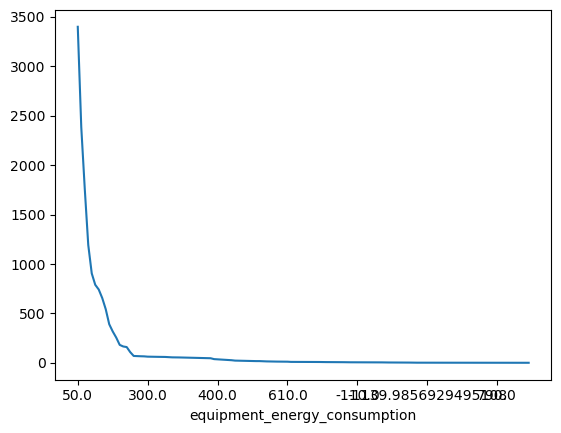

In [50]:
data_cop['equipment_energy_consumption'].value_counts().plot()